<a href="https://colab.research.google.com/github/GonzaBot/Clasificacion_de_imagenes_py/blob/main/Clasificaci%C3%B3n_de_im%C3%A1genes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar el conjunto de datos MNIST, que contiene imágenes de dígitos escritos a mano.
from keras.datasets import mnist
# Importar la clase Sequential, que permite crear modelos de redes neuronales de manera secuencial.
from keras.models import Sequential
# Importar la capa Dense, que es una capa de red neuronal completamente conectada.
from keras.layers import Dense
# Importar el optimizador SGD (Stochastic Gradient Descent), utilizado para ajustar los pesos de la red durante el entrenamiento.
from keras.optimizers import SGD
# Importar la función to_categorical, que convierte etiquetas de clases en un formato adecuado para usar en una red neuronal.
from keras.utils import to_categorical

# Importar la biblioteca matplotlib.pyplot para visualización de datos y gráficos.
import matplotlib.pyplot as plt
# Importar la biblioteca numpy para manipulación eficiente de matrices y operaciones matemáticas.
import numpy as np

In [ ]:
# Carga el conjunto de datos MNIST y divide en conjuntos de entrenamiento y prueba
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


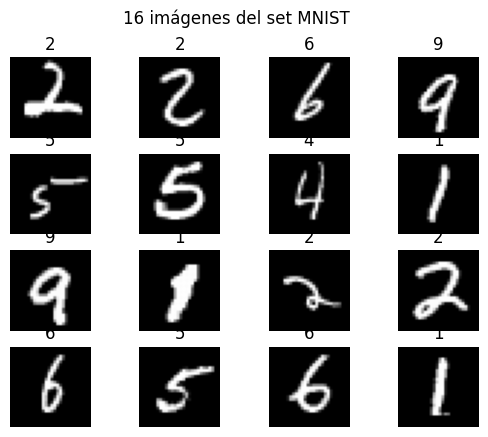

In [ ]:
# Genera 16 índices aleatorios para seleccionar imágenes del conjunto de entrenamiento
ids_imgs = np.random.randint(0,x_train.shape[0],16)
# Itera sobre los índices generados
for i in range(len(ids_imgs)):
	# Selecciona una imagen del conjunto de entrenamiento usando el índice actual
	img = x_train[ids_imgs[i],:,:]
	# Configura el subplot en una cuadrícula 4x4 y selecciona el i-ésimo subplot
	plt.subplot(4,4,i+1)
  # Muestra la imagen en escala de grises
	plt.imshow(img, cmap='gray')
  # Desactiva los ejes para una mejor visualización
	plt.axis('off')
  # Agrega un título al subplot que muestra la etiqueta correspondiente de la imagen
	plt.title(y_train[ids_imgs[i]])
  # Agrega un título general para la visualización
plt.suptitle('16 imágenes del set MNIST')
# Muestra la visualización
plt.show()

In [ ]:
# Aplana las imágenes en el conjunto de entrenamiento
X_train = np.reshape( x_train, (x_train.shape[0],x_train.shape[1]*x_train.shape[2]) )
# Aplana las imágenes en el conjunto de prueba
X_test = np.reshape( x_test, (x_test.shape[0],x_test.shape[1]*x_test.shape[2]) )

In [ ]:
# Normaliza los valores de los píxeles en el conjunto de entrenamiento
X_train = X_train/255.0
# Normaliza los valores de los píxeles en el conjunto de prueba
X_test = X_test/255.0

In [ ]:
# Número de clases en el conjunto de datos (MNIST tiene 10 clases, números del 0 al 9)
nclasses = 10
# Convierte las etiquetas de clase del conjunto de entrenamiento a codificación one-hot
Y_train = to_categorical(y_train, nclasses)
# Convierte las etiquetas de clase del conjunto de prueba a codificación one-hot
Y_test = to_categorical(y_test, nclasses)

In [ ]:
# Establecer una semilla aleatoria para reproducibilidad
np.random.seed(1)

In [ ]:
# Definir las dimensiones de entrada y salida para la red neuronal
input_dim = X_train.shape[1]
output_dim = Y_train.shape[1]

In [ ]:
# Crear un modelo secuencial de capas
modelo = Sequential()

In [ ]:
# Agregar una capa densa con 15 neuronas, función de activación ReLU y especificar la forma de entrada
modelo.add( Dense(15, input_dim=input_dim, activation='relu'))
# Agregar una capa densa con un número de neuronas igual al número de clases y función de activación softmax
modelo.add( Dense(output_dim, activation='softmax'))

In [ ]:
# Configurar el optimizador Stochastic Gradient Descent (SGD) con una tasa de aprendizaje de 0.2
sgd = SGD(lr=0.2)
# Compilar el modelo con la función de pérdida categorical_crossentropy, el optimizador SGD y métricas de precisión
modelo.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
#Ajustar el equilibrio entre el tiempo de entrenamiento y el rendimiento del modelo
num_epochs = 50

In [ ]:
# Tamaño del lote utilizado durante el entrenamiento
batch_size = 1024
# Entrenar el modelo y almacenar la información en la variable "historia"
historia = modelo.fit(X_train, Y_train, epochs=num_epochs, batch_size=batch_size, verbose=2)

Epoch 1/50
59/59 - 1s - loss: 2.2686 - accuracy: 0.1592 - 1s/epoch - 19ms/step
Epoch 2/50
59/59 - 1s - loss: 2.0772 - accuracy: 0.3458 - 509ms/epoch - 9ms/step
Epoch 3/50
59/59 - 1s - loss: 1.9034 - accuracy: 0.4538 - 515ms/epoch - 9ms/step
Epoch 4/50
59/59 - 1s - loss: 1.7263 - accuracy: 0.5190 - 503ms/epoch - 9ms/step
Epoch 5/50
59/59 - 0s - loss: 1.5467 - accuracy: 0.5784 - 496ms/epoch - 8ms/step
Epoch 6/50
59/59 - 0s - loss: 1.3812 - accuracy: 0.6411 - 495ms/epoch - 8ms/step
Epoch 7/50
59/59 - 0s - loss: 1.2339 - accuracy: 0.7000 - 489ms/epoch - 8ms/step
Epoch 8/50
59/59 - 0s - loss: 1.1062 - accuracy: 0.7466 - 444ms/epoch - 8ms/step
Epoch 9/50
59/59 - 0s - loss: 0.9978 - accuracy: 0.7750 - 324ms/epoch - 5ms/step
Epoch 10/50
59/59 - 0s - loss: 0.9078 - accuracy: 0.7933 - 328ms/epoch - 6ms/step
Epoch 11/50
59/59 - 0s - loss: 0.8342 - accuracy: 0.8068 - 334ms/epoch - 6ms/step
Epoch 12/50
59/59 - 0s - loss: 0.7739 - accuracy: 0.8182 - 332ms/epoch - 6ms/step
Epoch 13/50
59/59 - 0s - lo

Text(0.5, 0, 'Iteración')

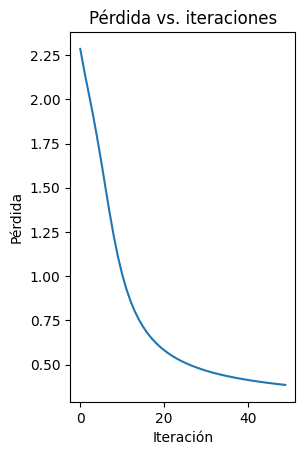

In [ ]:
# Crear un subplot en una fila y dos columnas, y seleccionar el primer subplot
plt.subplot(1,2,1)
# Graficar la pérdida en función de las iteraciones de entrenamiento
plt.plot(historia.history['loss'])
# Establecer el título del gráfico
plt.title('Pérdida vs. iteraciones')
# Etiquetar el eje y como 'Pérdida'
plt.ylabel('Pérdida')
# Etiquetar el eje x como 'Iteración'
plt.xlabel('Iteración')

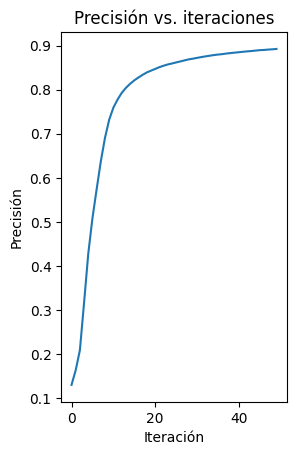

In [ ]:
# Crea un subplot en una cuadrícula de 1 fila y 2 columnas, y selecciona el segundo subplot para el siguiente gráfico.
plt.subplot(1,2,2)
# Grafica la precisión del modelo en el conjunto de entrenamiento a lo largo de las iteraciones.
# 'historia.history['accuracy']' contiene la precisión registrada durante el entrenamiento.
plt.plot(historia.history['accuracy'])
# Establece el título del gráfico como "Precisión vs. iteraciones"
plt.title('Precisión vs. iteraciones')
# Etiqueta del eje y, indicando que la escala vertical representa la precisión del modelo.
plt.ylabel('Precisión')
# Etiqueta del eje x, indicando que la escala horizontal representa las iteraciones de entrenamiento.
plt.xlabel('Iteración')
# Muestra el gráfico.
plt.show()

In [ ]:
# Evalúa el modelo en el conjunto de prueba y almacena la pérdida y la precisión en la variable 'puntaje'.
puntaje = modelo.evaluate(X_test,Y_test,verbose=0)
# Imprime la precisión del modelo en el conjunto de prueba en formato de porcentaje con una cifra decimal.
print('Precisión en el set de validación: {:.1f}%'.format(100*puntaje[1]))

Precisión en el set de validación: 89.9%


313/313 [==============================] - 1s 2ms/step


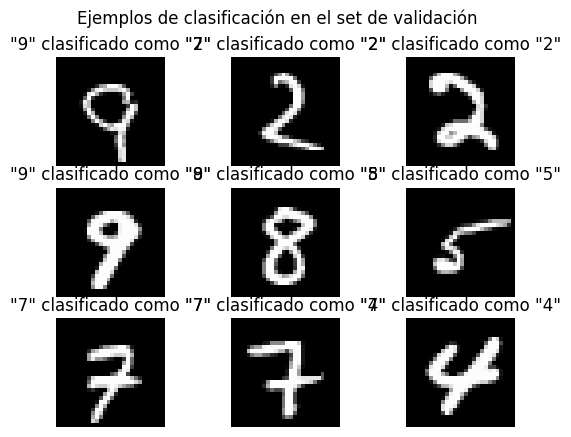

In [ ]:
# Realiza predicciones probabilísticas en el conjunto de prueba utilizando el modelo entrenado.
Y_pred_prob = modelo.predict(X_test)
# Convierte las predicciones probabilísticas en etiquetas de clase utilizando la función argmax.
Y_pred_prob = modelo.predict(X_test)
# Selecciona 9 índices de imágenes al azar del conjunto de prueba.
Y_pred = np.argmax(Y_pred_prob, axis=1)

# Itera sobre los índices seleccionados y muestra las imágenes junto con las etiquetas reales y predichas.
ids_imgs = np.random.randint(0,X_test.shape[0],9)
for i in range(len(ids_imgs)):
	idx = ids_imgs[i]
	img = X_test[idx,:].reshape(28,28)

  # Obtiene la categoría original y la categoría predicha para la imagen actual.
	cat_original = np.argmax(Y_test[idx,:])
	cat_prediccion = Y_pred[idx]

	# Configura la disposición de los subgráficos para mostrar múltiples imágenes.
	plt.subplot(3,3,i+1)
	plt.imshow(img, cmap='gray')
	plt.axis('off')
  # Muestra las etiquetas original y predicha como título de cada subgráfico.
	plt.title('"{}" clasificado como "{}"'.format(cat_original,cat_prediccion))
 # Agrega un título general a la colección de subgráficos.
plt.suptitle('Ejemplos de clasificación en el set de validación')
# Muestra la colección completa de subgráficos.
plt.show()